In [1]:
import io
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa

2021-10-09 03:28:33.661002: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
import os  
import cv2
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

# Loading np array from images
def make_dataset(labels, dir_path, IMG_SIZE = 150):
    # initial an empty list X to store image of np.array()
    X = []

    # initial an empty list Z to store labels/names of cat individauls
    Z = []
    for label in labels:
        DIR = dir_path + label
        for img in tqdm(os.listdir(DIR)):
            path = os.path.join(DIR,img)
            # reading images
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            # resizing images to (150, 150, 3), 3 is the number of channels - RGB
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
            X.append(np.array(img))
            Z.append(str(label)) 
    ## Transform labels in Z to Y from class 0 to class 9, as 10 different cat individuals
    le=LabelEncoder()
    Y=le.fit_transform(Z)

    ## Transform and normalize X in the range of [0, 1]
    X=np.array(X)
    X=X/255.
    return X, Y

In [3]:
dir_path = '/kaggle/input/squirrel-monkey/Saimiri sciureus/'
IMG_SIZE = 150
labels = [str(i) for i in range(44)]

X, Y = make_dataset(labels, dir_path)

100%|██████████| 4/4 [00:00<00:00, 261.16it/s]


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val ,y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 2021)

# Learning rate schedule

In [5]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 4))

# VGG 16 classification model

In [6]:
imsize = 150
lr = 1e-5
EPOCHS = 20
batch_size = 256

base_model_16 = tf.keras.applications.vgg16.VGG16(include_top=False,
                      input_shape = (imsize,imsize,3),
                      weights = 'imagenet')

# freeze all the layers of VGG, so they won't be trained.
for layer in base_model_16.layers:
    layer.trainable = False

model_vgg_16 = tf.keras.models.Sequential([
    base_model_16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dense(units=44, activation='softmax')
])

model_vgg_16.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='sparse_categorical_crossentropy', metrics=['acc']) 

history = model_vgg_16.fit(x=x_train, y=y_train,
                           epochs=EPOCHS,
                           batch_size=batch_size,
                           validation_data = (x_val, y_val),
                           verbose=1, 
                           callbacks = [lr_schedule])

2021-10-09 03:28:41.846306: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-09 03:28:41.849169: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-09 03:28:41.889607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-09 03:28:41.890219: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-09 03:28:41.890273: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-09 03:28:41.914133: I tensorflow/stream_executor/platform/def

58892288/58889256 [==============================] - 0s 0us/step


2021-10-09 03:28:44.395862: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-09 03:28:44.407380: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000140000 Hz


Epoch 1/20


2021-10-09 03:28:45.191381: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-09 03:28:45.865220: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-09 03:28:45.897631: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


1/1 [==============================] - 16s 16s/step - loss: 4.0578 - acc: 0.0348 - val_loss: 3.9283 - val_acc: 0.0588
Epoch 2/20
1/1 [==============================] - 0s 298ms/step - loss: 4.0061 - acc: 0.0498 - val_loss: 3.8784 - val_acc: 0.0784
Epoch 3/20
1/1 [==============================] - 0s 286ms/step - loss: 3.9181 - acc: 0.0647 - val_loss: 3.7990 - val_acc: 0.0784
Epoch 4/20
1/1 [==============================] - 0s 288ms/step - loss: 3.7729 - acc: 0.0945 - val_loss: 3.6840 - val_acc: 0.0784
Epoch 5/20
1/1 [==============================] - 0s 304ms/step - loss: 3.5477 - acc: 0.1741 - val_loss: 3.5567 - val_acc: 0.1373
Epoch 6/20
1/1 [==============================] - 0s 306ms/step - loss: 3.2415 - acc: 0.2388 - val_loss: 3.4999 - val_acc: 0.1765
Epoch 7/20
1/1 [==============================] - 0s 303ms/step - loss: 2.9121 - acc: 0.3085 - val_loss: 3.4625 - val_acc: 0.2353
Epoch 8/20
1/1 [==============================] - 0s 294ms/step - loss: 2.5266 - acc: 0.4428 - val_los

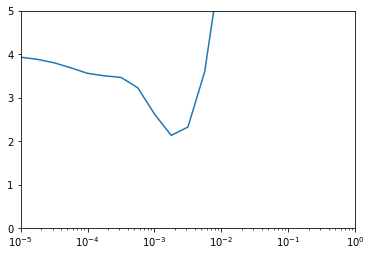

In [7]:
import matplotlib.pyplot as plt
plt.semilogx(history.history["lr"], history.history["val_loss"])
plt.axis([1e-5, 1, 0, 5])
plt.show()

In [8]:
# the loss is decreased fastest when LR is between 5e-4 and 5e-3
lr = 1e-3
base_model_16 = tf.keras.applications.vgg16.VGG16(include_top=False,
                      input_shape = (imsize,imsize,3),
                      weights = 'imagenet')

# freeze all the layers of VGG, so they won't be trained.
for layer in base_model_16.layers:
    layer.trainable = False

model_vgg_16 = tf.keras.models.Sequential([
    base_model_16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dense(units=44, activation='softmax')
])

model_vgg_16.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='sparse_categorical_crossentropy', metrics=['acc']) 

history = model_vgg_16.fit(x=x_train, y=y_train,
                           epochs=EPOCHS,
                           batch_size=batch_size,
                           validation_data = (x_val, y_val), 
                           verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 4.1309 - acc: 0.0050 - val_loss: 5.9011 - val_acc: 0.0392
Epoch 2/20
1/1 [==============================] - 0s 287ms/step - loss: 4.6219 - acc: 0.1045 - val_loss: 4.9694 - val_acc: 0.2549
Epoch 3/20
1/1 [==============================] - 0s 288ms/step - loss: 3.9078 - acc: 0.3284 - val_loss: 4.3484 - val_acc: 0.3137
Epoch 4/20
1/1 [==============================] - 0s 335ms/step - loss: 3.5899 - acc: 0.4478 - val_loss: 3.9387 - val_acc: 0.3725
Epoch 5/20
1/1 [==============================] - 0s 315ms/step - loss: 3.3270 - acc: 0.5025 - val_loss: 3.4886 - val_acc: 0.4902
Epoch 6/20
1/1 [==============================] - 0s 311ms/step - loss: 2.8438 - acc: 0.7114 - val_loss: 3.1975 - val_acc: 0.4314
Epoch 7/20
1/1 [==============================] - 0s 291ms/step - loss: 2.4221 - acc: 0.7711 - val_loss: 2.8694 - val_acc: 0.5490
Epoch 8/20
1/1 [==============================] - 0s 306ms/step - loss: 1.9854 - acc: 0.8358 

In [9]:
model_vgg_16.evaluate(x_val, y_val)

2/2 [==============================] - 2s 940ms/step - loss: 1.4955 - acc: 0.6471


[1.495505928993225, 0.6470588445663452]

# Contrastive loss

In [10]:
# Helper Function 

# Create positive pairs and negative pairs
import random
def create_pairs(images, labels):
    numClasses = 44
    # initialize two empty lists to hold the (image, image) pairs and
    # labels to indicate if a pair is positive (0) or negative (1)
    np.random.seed(2021)
    pairImages = []
    pairLabels = []
    
    # calculate the total number of classes present in the dataset
    # and then build a list of indexes for each class label that
    # provides the indexes for all examples with a given label
    idx = [np.where(labels == i)[0] for i in range(44)]
    
    # loop voer all images
    for idxA in range(len(images)):
        # grab the current image and label belonging to the current iteration
        currentImage = images[idxA]
        label = labels[idxA]
        
        # randomly pick on an image that belongs to the *same* class label
        posId = random.choice(idx[label])
        posImage = images[posId]
        
        # prepare a positive pair and update the images and labels
        pairImages.append([currentImage, posImage])
        pairLabels.append([0])
        
        # grab the indices for each of the class labels *not* equal to
        # the current label and randomly pick an image corresponding
        # to a label *not* equal to the current label
        negId = np.where(labels != label)[0]
        negIdx = random.choice(negId)
        negImage = images[negIdx]
        
        # prepare a negative pair of images and update out lists
        pairImages.append([currentImage, negImage])
        pairLabels.append([1])
    
    return (np.array(pairImages), np.array(pairLabels))



# Function to calculate the distance between two images (Euclidean Distance used here)
import tensorflow.keras.backend as K
def euclidean_distance(vectors):
    # unpack the vectors into separate lists
    (featsA, featsB) = vectors
    # compute the sum of squared distances between the vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1,
                       keepdims=True)
    # return the euclidean distance between the vectors
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))


# contrastive loss function
def contrastive_loss(y, preds, margin=1):
    # explicitly cast the true class label data type to the predicted
    # class label data type (otherwise we run the risk of having two
    # separate data types, causing TensorFlow to error out)
    y = tf.cast(y, preds.dtype)
    # calculate the contrastive loss between the true labels and
    # the predicted labels
    squaredPreds = K.square(preds)
    squaredMargin = K.square(K.maximum(margin - preds, 0))
    loss = K.mean((1 - y) * squaredPreds + y * squaredMargin)
    # return the computed contrastive loss to the calling function
    return loss

In [11]:
(pairTrain, labelTrain) = create_pairs(x_train, y_train)
(pairVal, labelVal) = create_pairs(x_val, y_val)

In [12]:
lr = 1e-5
embeddingDim = 128

base_model_16 = tf.keras.applications.vgg16.VGG16(include_top=False,
                  input_shape = (imsize,imsize,3),
                  weights = 'imagenet')

# freeze all the layers of VGG, so they won't be trained.
for layer in base_model_16.layers:
    layer.trainable = False

    

model_cl = tf.keras.models.Sequential([
    base_model_16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dense(embeddingDim, activation=None), # No activation on final dense layer
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) # L2 normalize embeddings
])

    
imgA = tf.keras.layers.Input(shape=((imsize, imsize, 3)))
imgB = tf.keras.layers.Input(shape=((imsize, imsize, 3)))
    
featsA = model_cl(imgA)
featsB = model_cl(imgB)
   
distance = tf.keras.layers.Lambda(euclidean_distance)([featsA, featsB])
model = tf.keras.Model(inputs=[imgA, imgB], outputs=distance)
model.compile(loss=contrastive_loss, optimizer=tf.keras.optimizers.Adam(lr))

history = model.fit([pairTrain[:, 0], pairTrain[:, 1]], labelTrain[:],
                    batch_size = batch_size,
                    validation_data = ([pairVal[:, 0], pairVal[:, 1]], labelVal[:]),
                    epochs=EPOCHS, 
                    verbose=1,
                    callbacks = [lr_schedule])

Epoch 1/20
2/2 [==============================] - 35s 17s/step - loss: 0.1889 - val_loss: 0.1446
Epoch 2/20
2/2 [==============================] - 1s 656ms/step - loss: 0.1756 - val_loss: 0.1250
Epoch 3/20
2/2 [==============================] - 1s 521ms/step - loss: 0.1635 - val_loss: 0.0982
Epoch 4/20
2/2 [==============================] - 1s 535ms/step - loss: 0.1494 - val_loss: 0.0819
Epoch 5/20
2/2 [==============================] - 1s 521ms/step - loss: 0.1422 - val_loss: 0.0884
Epoch 6/20
2/2 [==============================] - 1s 555ms/step - loss: 0.1081 - val_loss: 0.1093
Epoch 7/20
2/2 [==============================] - 1s 525ms/step - loss: 0.0945 - val_loss: 0.0747
Epoch 8/20
2/2 [==============================] - 1s 553ms/step - loss: 0.0708 - val_loss: 0.0697
Epoch 9/20
2/2 [==============================] - 1s 555ms/step - loss: 0.0514 - val_loss: 0.1011
Epoch 10/20
2/2 [==============================] - 1s 558ms/step - loss: 0.0467 - val_loss: 0.0648
Epoch 11/20
2/2 [===

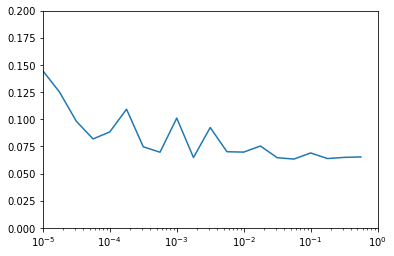

In [13]:
import matplotlib.pyplot as plt
plt.semilogx(history.history["lr"], history.history["val_loss"])
plt.axis([1e-5, 1, 0, 0.2])
plt.show()

In [14]:
# the loss is decreased fast when LR is between 1e-5 and 1e-4
lr = 5e-5

base_model_16 = tf.keras.applications.vgg16.VGG16(include_top=False,
                  input_shape = (imsize,imsize,3),
                  weights = 'imagenet')

# freeze all the layers of VGG, so they won't be trained.
for layer in base_model_16.layers:
    layer.trainable = False

model_cl = tf.keras.models.Sequential([
    base_model_16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dense(embeddingDim, activation=None), # No activation on final dense layer
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) # L2 normalize embeddings
])
    
imgA = tf.keras.layers.Input(shape=((imsize, imsize, 3)))
imgB = tf.keras.layers.Input(shape=((imsize, imsize, 3)))
    
featsA = model_cl(imgA)
featsB = model_cl(imgB)
   
distance = tf.keras.layers.Lambda(euclidean_distance)([featsA, featsB])
model = tf.keras.Model(inputs=[imgA, imgB], outputs=distance)
model.compile(loss=contrastive_loss, optimizer=tf.keras.optimizers.Adam(lr))

history = model.fit([pairTrain[:, 0], pairTrain[:, 1]], labelTrain[:],
                    batch_size = batch_size, 
                    epochs=EPOCHS, 
                    verbose=1)

Epoch 1/20
2/2 [==============================] - 2s 314ms/step - loss: 0.1838
Epoch 2/20
2/2 [==============================] - 1s 285ms/step - loss: 0.1566
Epoch 3/20
2/2 [==============================] - 1s 317ms/step - loss: 0.1423
Epoch 4/20
2/2 [==============================] - 1s 316ms/step - loss: 0.1265
Epoch 5/20
2/2 [==============================] - 1s 314ms/step - loss: 0.1161
Epoch 6/20
2/2 [==============================] - 1s 298ms/step - loss: 0.1069
Epoch 7/20
2/2 [==============================] - 1s 313ms/step - loss: 0.0951
Epoch 8/20
2/2 [==============================] - 1s 314ms/step - loss: 0.0868
Epoch 9/20
2/2 [==============================] - 1s 306ms/step - loss: 0.0781
Epoch 10/20
2/2 [==============================] - 1s 315ms/step - loss: 0.0711
Epoch 11/20
2/2 [==============================] - 1s 320ms/step - loss: 0.0676
Epoch 12/20
2/2 [==============================] - 1s 311ms/step - loss: 0.0643
Epoch 13/20
2/2 [==============================] 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

def acc_cl(x_test, y_test, k = 1):
    embedding_train_cl = []
    for i in range(len(y_train)):
        embedding_train_cl.append(model_cl(x_train[i].reshape(1, imsize, imsize, 3))[0])
    embedding_train_cl = np.array(embedding_train_cl, dtype=float) 

    knn_cl = KNeighborsClassifier(n_neighbors = k)
    knn_cl.fit(embedding_train_cl, y_train)
    
    x_test_embedding = model_cl(x_test)
    acc_close = round(knn_cl.score(x_test_embedding, y_test), 2)
    print('The accuracy on the Closed Dataset with contrastive loss is {}'.format(acc_close))
    
    return acc_close

# Tuning k value of kNN

In [16]:
K = [1, 3, 5, 7, 9]
acc_c = []
for i in K:
    acc_c.append(acc_cl(x_val, y_val, k = i))

The accuracy on the Closed Dataset with contrastive loss is 0.73
The accuracy on the Closed Dataset with contrastive loss is 0.69
The accuracy on the Closed Dataset with contrastive loss is 0.69
The accuracy on the Closed Dataset with contrastive loss is 0.61
The accuracy on the Closed Dataset with contrastive loss is 0.59


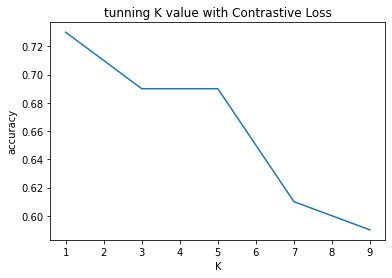

In [17]:
import matplotlib.pyplot as plt

plt.plot(K, acc_c)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('tunning K value with Contrastive Loss')
plt.show()

In [18]:
acc_cl(x_val, y_val, k = 1)

The accuracy on the Closed Dataset with contrastive loss is 0.73


0.73

# Triplet loss

In [19]:
lr = 1e-5

base_model_16 = tf.keras.applications.vgg16.VGG16(include_top=False,
                      input_shape = (imsize, imsize, 3),
                      weights = 'imagenet')

# freeze all the layers of VGG, so they won't be trained.
for layer in base_model_16.layers:
    layer.trainable = False

model_tl = tf.keras.models.Sequential([
    base_model_16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dense(embeddingDim, activation=None), # No activation on final dense layer
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) # L2 normalize embeddings
])

model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tfa.losses.TripletSemiHardLoss())

history = model_tl.fit(x=x_train, y= y_train,
                       batch_size=batch_size,
                       epochs=EPOCHS,
                       validation_data = (x_val, y_val),
                       verbose=1, 
                       callbacks = [lr_schedule])

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.9818 - val_loss: 0.9468
Epoch 2/20
1/1 [==============================] - 0s 306ms/step - loss: 0.9805 - val_loss: 0.9455
Epoch 3/20
1/1 [==============================] - 0s 292ms/step - loss: 0.9782 - val_loss: 0.9448
Epoch 4/20
1/1 [==============================] - 0s 289ms/step - loss: 0.9742 - val_loss: 0.9395
Epoch 5/20
1/1 [==============================] - 0s 290ms/step - loss: 0.9643 - val_loss: 0.9273
Epoch 6/20
1/1 [==============================] - 0s 297ms/step - loss: 0.9389 - val_loss: 0.8962
Epoch 7/20
1/1 [==============================] - 0s 289ms/step - loss: 0.8740 - val_loss: 0.8347
Epoch 8/20
1/1 [==============================] - 0s 292ms/step - loss: 0.7465 - val_loss: 0.8328
Epoch 9/20
1/1 [==============================] - 0s 308ms/step - loss: 0.6982 - val_loss: 0.8232
Epoch 10/20
1/1 [==============================] - 0s 290ms/step - loss: 0.6780 - val_loss: 0.8132
Epoch 11/20
1/1 [=====

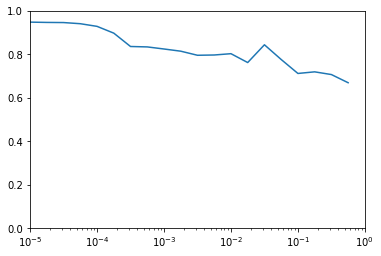

In [20]:
import matplotlib.pyplot as plt
plt.semilogx(history.history["lr"], history.history["val_loss"])
plt.axis([1e-5, 1, 0, 1])
plt.show()

In [21]:
# the loss is decreased fast when LR is between 1e-4 and 5e-4
lr = 3e-4

base_model_16 = tf.keras.applications.vgg16.VGG16(include_top=False,
                      input_shape = (imsize, imsize, 3),
                      weights = 'imagenet')

# freeze all the layers of VGG, so they won't be trained.
for layer in base_model_16.layers:
    layer.trainable = False

model_tl = tf.keras.models.Sequential([
    base_model_16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dense(embeddingDim, activation=None), # No activation on final dense layer
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) # L2 normalize embeddings
])

model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tfa.losses.TripletSemiHardLoss())

history = model_tl.fit(x=x_train, y= y_train,
                       batch_size=batch_size,
                       epochs=EPOCHS, 
                       verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 822ms/step - loss: 0.9802
Epoch 2/20
1/1 [==============================] - 0s 210ms/step - loss: 0.9350
Epoch 3/20
1/1 [==============================] - 0s 196ms/step - loss: 0.8288
Epoch 4/20
1/1 [==============================] - 0s 197ms/step - loss: 0.7086
Epoch 5/20
1/1 [==============================] - 0s 192ms/step - loss: 0.6051
Epoch 6/20
1/1 [==============================] - 0s 210ms/step - loss: 0.5372
Epoch 7/20
1/1 [==============================] - 0s 197ms/step - loss: 0.4484
Epoch 8/20
1/1 [==============================] - 0s 194ms/step - loss: 0.3859
Epoch 9/20
1/1 [==============================] - 0s 198ms/step - loss: 0.3344
Epoch 10/20
1/1 [==============================] - 0s 208ms/step - loss: 0.2822
Epoch 11/20
1/1 [==============================] - 0s 195ms/step - loss: 0.2460
Epoch 12/20
1/1 [==============================] - 0s 218ms/step - loss: 0.2119
Epoch 13/20
1/1 [==============================] 

In [22]:
def acc_tl(x_test, y_test, k = 1):
    embedding_train_tl = []
    for i in range(len(y_train)):
        embedding_train_tl.append(model_tl(x_train[i].reshape(1, imsize, imsize, 3))[0])
        
    embedding_train_tl = np.array(embedding_train_tl, dtype=float) 

    knn_tl = KNeighborsClassifier(n_neighbors = k)
    knn_tl.fit(embedding_train_tl, y_train)
    
    x_test_embedding = model_tl(x_test)
    acc_close = round(knn_tl.score(x_test_embedding, y_test), 2)
    print('The accuracy on the Closed Dataset with triplet loss is {}'.format(acc_close))
    
    return acc_close

# tuning k value of kNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

K = [1, 3, 5, 7, 9]
acc_t = []
for i in K:
    acc_t.append(acc_tl(x_val, y_val, k = i))

The accuracy on the Closed Dataset with triplet loss is 0.75
The accuracy on the Closed Dataset with triplet loss is 0.69
The accuracy on the Closed Dataset with triplet loss is 0.65
The accuracy on the Closed Dataset with triplet loss is 0.59
The accuracy on the Closed Dataset with triplet loss is 0.51


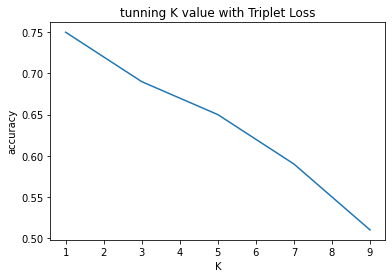

In [24]:
import matplotlib.pyplot as plt

plt.plot(K, acc_t)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('tunning K value with Triplet Loss')
plt.show()

In [25]:
acc_tl(x_val, y_val, k = 1)

The accuracy on the Closed Dataset with triplet loss is 0.75


0.75